<center><font color=#555555><font size=6> Microestructuras y Sistemas de Trading </font> <br> <br>
    
<center><font color=#555555><font size=5> Ingeniería Financiera </font> <br> <br> <br> <br>

<center><font color=#555555><font size=6> I.F. Emilio Morán Hernández </font> <br> <br>
   
<center> <font color= #555555> <font size = 4> Septiembre 2022 </a> | <font color= #555555> <font size = 4> Repository: <a href='https://github.com/EmilioMH01/Lab1'>Link</a></font>

<center> <font color= #555555> <font size = 6> Laboratorio 1: Inversión de Capital </font> <br> <br> <font color= #555555> 

# <font color= #6B6B6B> 0. Install/Load Packages and Depedencies </font>

<hr style="border:0.02in solid gray"> </hr>

In [10]:
import pandas as pd
import pandas_datareader.data as web
import math as mt
import numpy as np

- Estas son las librerias a utilizar:
    - pandas>=1.1.0
    - numpy>=1.19.1
    - jupyter>=1.0.0
    - chart_studio>=1.1
    - plotly>=4.14

## <font color= #6B6B6B> 0.1 Files Dependencies </font> <font color= #555555>

- Lab_1/NAFTRAC_20220729.csv : Precios históricos

# <font color= #6B6B6B> <font size = 6> 1. Introducción </font>


<hr style="border:0.02in solid gray"> </hr>

En finanzas, una estrategia de inversión es algo muy utilizado para ayudar a una persona, en este caso, un inversor para que pueda tomar las deciciones correctas sobre la cartera de valores correctos que le daran mejores resultados, podriamos definirlas como un  conjunto de reglas, comportamientos y procedimientos. Dependiendo de que es lo que busque el inversor, en torno a ello es como se diseña la estrategia, hay quienes prefieres arriesgar y ganar mucho y otros que de manera mas conservativa obtener rendimientos de una manera más segura y controlada.


### Inversión Activa
+ No sigue los movimientos del mercado de valores, sino que compra acciones cuyo valor pueda subir en un futuro cercano para generar ganancias. Implica mover constantemente las inversiones, por lo cual tiene un riesgo más alto que la inversión pasiva.

### Inversión Pasiva
+ La inversión pasiva es un enfoque de inversión a largo plazo con el objetivo de crear riqueza gradualmente a lo largo del tiempo. Al minimizar la compra y venta de valores, la inversión pasiva aumenta las ganancias a largo plazo gracias al ahorro de costos.

### Rebalanceo
+ El rebalanceo es un proceso por medio del cual la estructura de un portafolio se ajusta a la estructura pactada originalmente, y de la cual se ha alejado de manera natural por los movimientos de los mercados. 

### Portafolio de Inversión
+ La especialista señala que un portafolio o cartera de inversiones es el conjunto total de activos financieros que una persona tiene, puede estar compuesto por instrumentos de renta fija, variable o mixta como bonos, acciones, monedas, efectivo, materias primas y productos derivados. Dicho portafolio debe responder a una serie de características a considerar al momento de armarlo, entre ellos, tu perfil de riesgo, la rentabilidad de cada instrumento y el tiempo esperado de retorno de la inversión; todo ello en función de tu estrategia general de inversión.

# <font color= #6B6B6B> 2. Objetivos </font>

<hr style="border:0.02in solid gray"> </hr>

#### Poder responder la pregunta ¿Qué estrategia de inversión propondrías si tu trabajo fuera invertir 1 Millón de pesos? Hacer una Inversión Pasiva del capital, comprando el 100% del capital de títulos de un ETF que replica al mercado de renta variable mexicano S&P/BMV IPC que es el NAFTRAC. Pero por otro lado, puedes hacer una Inversión Activa del capital, al crear un portafolio que tenga los mismos activos que el ETF y haciendo el rebalanceo correspondiente

# <font color= #6B6B6B> 3. Data Description </font>

<hr style="border:0.02in solid gray"> </hr>

#### Para este proyecto se utilzaron los activos pertenecientes al fondo de inversión "NAFTRAC", que cotizaron en el periodo de 31-01-2020 ha 29-07-2022,  con el fin de obtener dos posibles inversiones, una activa y una pasiva. Todos los activos que no cotizaron en cada uno de los periodos se removieron, a continuación, un ejemplo de los activos que cotizaron durante el útlimo periodo 29-07-2022

In [5]:
historicos = pd.read_csv('Lab_1/NAFTRAC_20220729.csv', skiprows=2)
historicos.head(5)

,Ticker,Nombre,Clase de activo,Peso (%),Precio,Acciones,Valor de mercado,Valor nominal,Sector,Unnamed: 9,ISIN,Bolsa de valores,Ubicación,Moneda,Mercado de divisas,Tipo de Cambio
0,AMXL,AMERICA MOVIL L,Equity,14.94,19.40,"429,379,400.00","8,329,960,360.00","8,329,960,360.00",Comunicación,2667470,MXP001691213,Bolsa Mexicana De Valores,México,MXN,MXN,1.0
1,WALMEX*,WALMART DE MEXICO V,Equity,12.88,73.84,"97,247,481.00","7,180,753,997.04","7,180,753,997.04",Productos básicos de consumo,BW1YVH8,MX01WA000038,Bolsa Mexicana De Valores,México,MXN,MXN,1.0
2,GFNORTEO,GPO FINANCE BANORTE,Equity,9.79,115.99,"47,068,861.00","5,459,517,187.39","5,459,517,187.39",Financieros,2421041,MXP370711014,Bolsa Mexicana De Valores,México,MXN,MXN,1.0
3,GMEXICOB,GRUPO MEXICO B,Equity,8.65,80.60,"59,802,565.00","4,820,086,739.00","4,820,086,739.00",Materiales,2643674,MXP370841019,Bolsa Mexicana De Valores,México,MXN,MXN,1.0
4,FEMSAUBD,FOMENTO ECONOMICO MEXICANO,Equity,8.04,127.03,"35,278,535.00","4,481,432,301.05","4,481,432,301.05",Productos básicos de consumo,2242059,MXP320321310,Bolsa Mexicana De Valores,México,MXN,MXN,1.0


# <font color= #6B6B6B> 4 Procesos </font>

<hr style="border:0.02in solid gray"> </hr>

## <font color= #6B6B6B> 4.1 Inversión Pasiva  </font>

#### En esta primera tabla podemos ver el valor del portafolio durante los meses de inversión para poder evaluar la evolución del portafolio a través del tiemmpo asi como del incremento o decremento del capital invertido. (Se obtiene llamando a la variable df_pasiva)

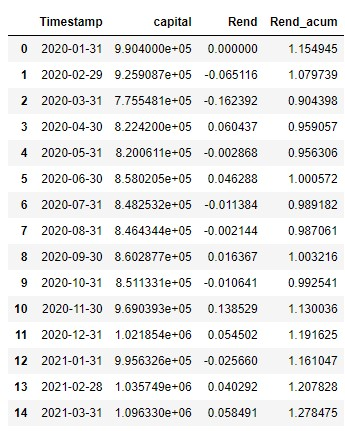

#### Podemos ver claramente como los primeros meses fueron algo complicados puesto que el rendimiento de nuestra inversión fue negativo,  mas adelante comenzo a proporcionar rendimientos positivos resultado de nuestra inversión pasiva

## <font color= #6B6B6B> 4.2 Inversión Activa  </font>

#### Siguiendo los mismos pasos para la inversión pasiva para el calculo de los pesos y valor del portafolio se genero una inversión activa en donde la estrategia fue comprar un 2.5% más de activos cuyo precio aumento un 5% y de forma inversa con aquellos activos cuyo precio disminuyo un 5%, es decir, deshacernos el 2.5% de nuestra posición

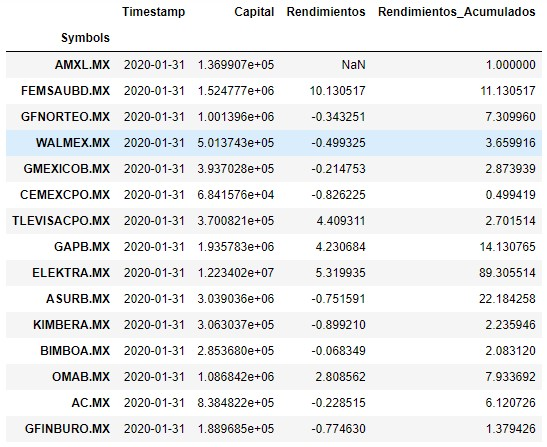

#### A diferencia de la pasiva, podemos observiar que obtenemos mejores rendimientos individuales en la mayoría de los activos presentados en el dataFrame

## <font color= #6B6B6B> 4.3 Histórico de operaciones </font>

#### Finalmente se realizó un dataFrame de los precios después de haber generado los rebalanceos por la comisión de 0.00125 junto la acumulación de cada mes por activo

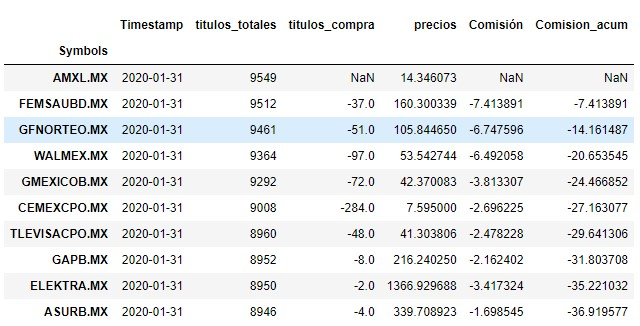

## <font color= #6B6B6B> 4.4 Medidas de Atribución al Desempeño </font>

<hr style="border:0.02in solid gray"> </hr>

#### Juntando toda la información se construyo un portafolio en donde se pudiera ver que tipo de rendimientos tendriamos de cada inversión y tomar una decición con respecto a como manejar la inversión

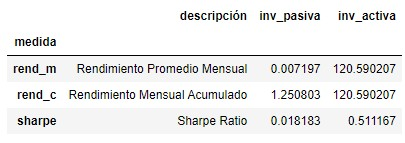

## <font color= #6B6B6B> 5 Conclusión </font>

Durante el laboratiorio pude notar que con la combinacion de activos seleccionada una estrategia de inversión activa es muchisimo mejor debido al constante rebalanceo de los activos, se les prestaba mayor atención a los movimientos que el mercado realizaba y por lo tanto era mas sencillo siempre mantener dentro de nuestro portafolio la cantidad óptima de titulos para que estos siempre nos generan una ganancia mayor. 

De igual manera es importante recalcar que al final de cuentas cada inversion es diferente ya que esta esta diseñada en torno al inversor por lo cual personalmente considero que ambas estrategias son buenas opciones ya que el inversor es quien tiene la última palabra en cuanto a como manejar su dinero y los resultados que este quiere obtener.
